In [5]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from tqdm.autonotebook import tqdm, trange

In [6]:
data=pd.read_csv("all_structural_data_oh.csv", index_col=0)
batch=data.iloc[:,-1]
x=data.iloc[:,:-11]
y=data.iloc[:,-11:-1]

for col in ['Sim 1 Dropout X Disp.', 'Sim 1 Dropout Y Disp.', 'Sim 1 Bottom Bracket X Disp.', 'Sim 1 Bottom Bracket Y Disp.', 'Sim 2 Bottom Bracket Z Disp.', 'Sim 3 Bottom Bracket Y Disp.', 'Sim 3 Bottom Bracket X Rot.', 'Model Mass']:      
    y[col]=[np.abs(val) for val in y[col].values]
reduced=["Sim 1 Dropout Y Disp.", "Sim 2 Bottom Bracket Z Disp.", "Sim 3 Bottom Bracket X Rot.", "Sim 1 Safety Factor", "Model Mass"]
y_red=y[reduced]
y_red.columns=["Sim 1 Dropout Y Disp. (mm)", "Sim 2 Bottom Br. Z Disp. (mm)", "Sim 3 Bottom Bracket X Rot. (rad)", "Sim 1 Safety Factor", "Model Mass (kg)"]
y_red["Sim 2 Bottom Br. Z Disp. (mm)"]=y_red["Sim 2 Bottom Br. Z Disp. (mm)"]*1000

In [7]:
# print(y.idxmax(axis=0))

# val=y[y["Sim 1 Safety Factor"]>1]
# val=val[val["Sim 3 Safety Factor"]>1]
# print(val.idxmin(axis=0))


In [8]:
#Plot Valid vs invalid
classes=list(np.zeros(len(y_red.index)))
for i in range(len(y_red.index)):
    if data["Sim 1 Safety Factor"].iloc[i]>1:
        if data["Sim 3 Safety Factor"].iloc[i]>1:
            classes[i]="Valid"
        else:
            classes[i]="Invalid"
    else:
        classes[i]="Invalid"     
# selections=["Model 2108 [Invalid]", "Model 857 [Valid]", "Model 3853 [Invalid]"]
selections=["Example Bike 1", "Example Bike 2", "Example Bike 3"]
classes[y.index.get_loc(3853)]=selections[0]
classes[y.index.get_loc(2108)]=selections[1]
classes[y.index.get_loc(857)]=selections[2]
y_val=y_red.copy()
y_val.columns=["In-Plane: Dropout Y Disp. (m)", "Transverse: BB. Z Disp. (mm)", "Eccentric: BB. X Rot. (rad)", "In-Plane: Safety Factor", "Model Mass (kg)"]
y_val["Legend:"]=classes
categories = ["Invalid", "Valid"] + selections
y_val["Legend:"] = pd.Categorical(y_val["Legend:"], categories = categories)
y_val.sort_values("Legend:", inplace=True)

s = 100*np.ones(len(y_val))
s[-3:]=500
# print(y_val["Legend:"].value_counts())

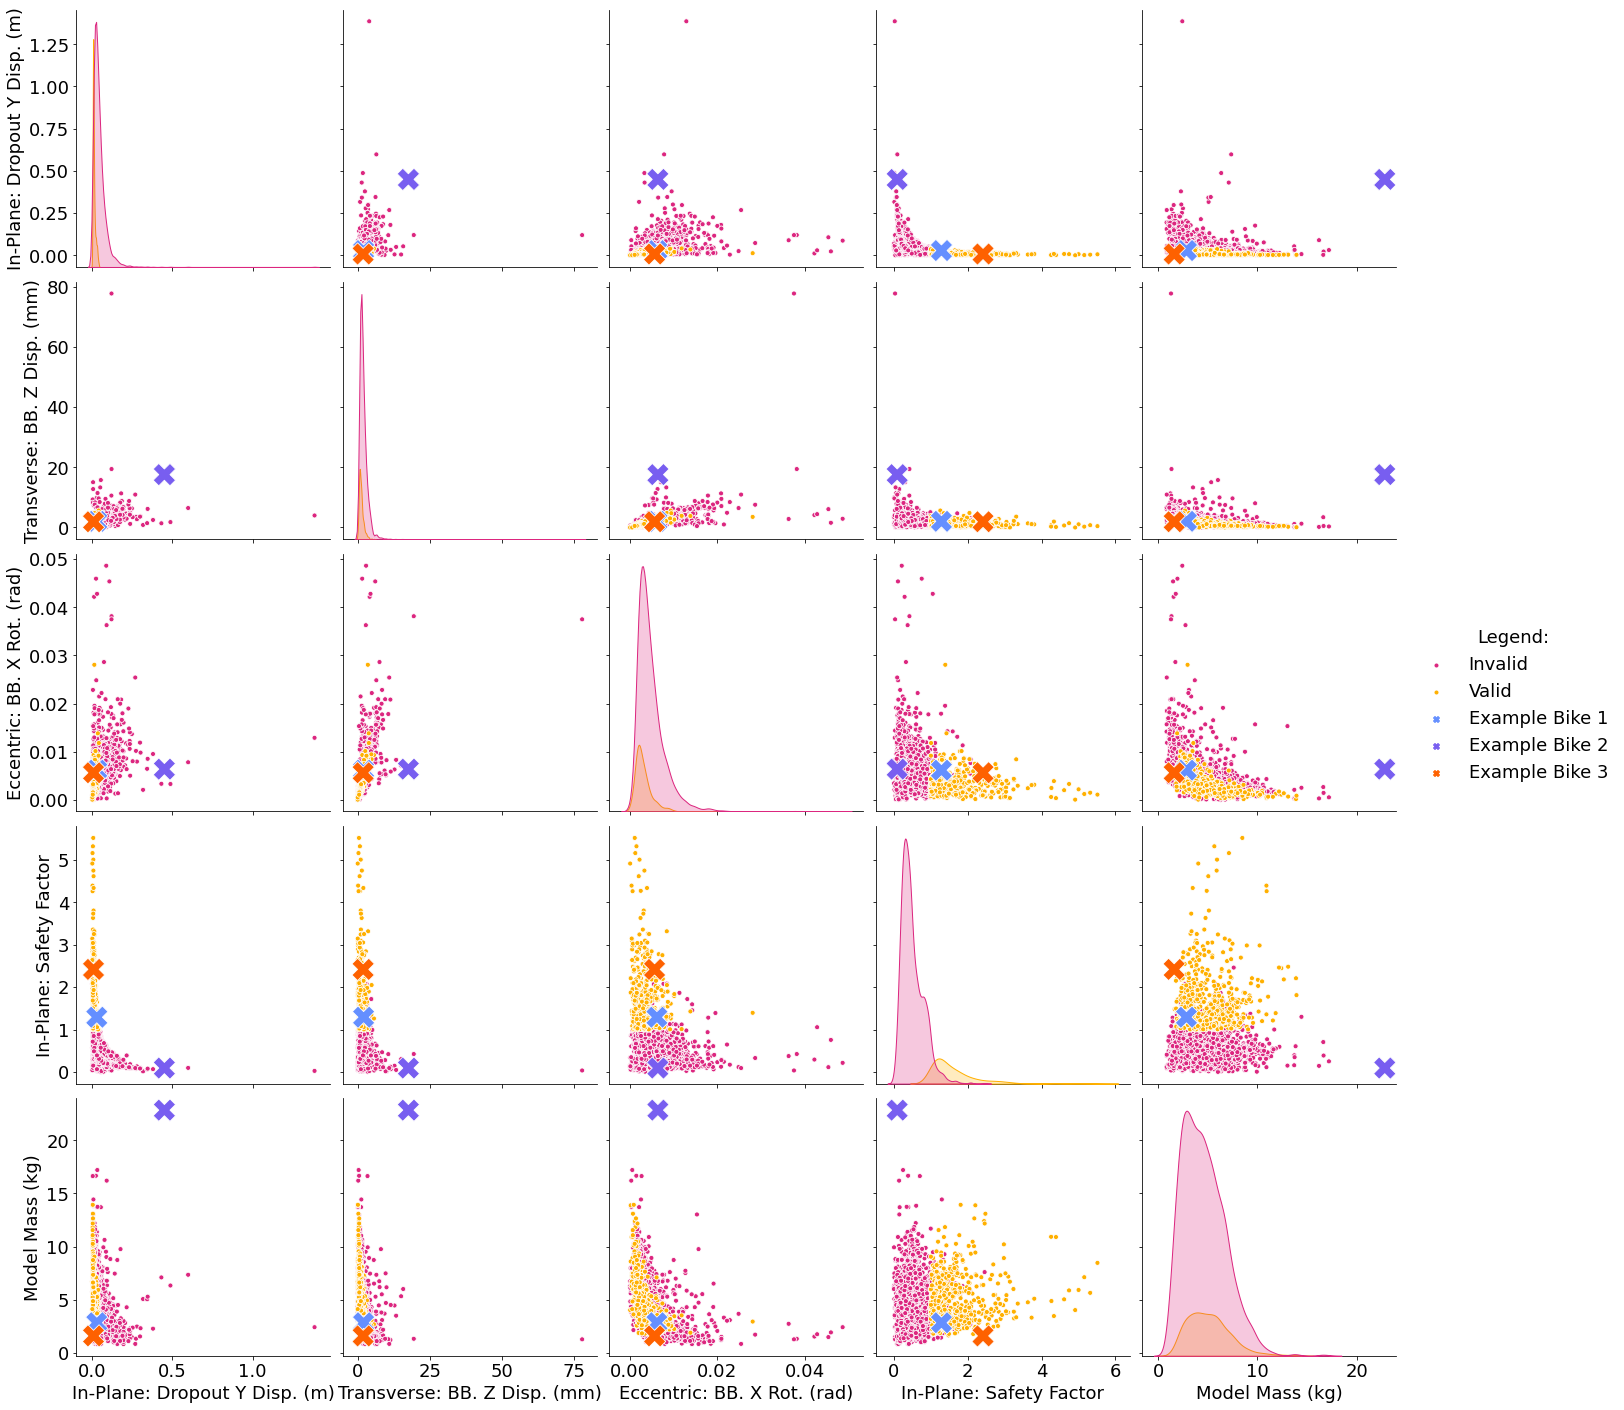

In [9]:
# g=sns.PairGrid(data_red, vars=data_red.columns)
# g.map(sns.scatterplot)
plt.rcParams.update({'font.size': 18})

hue_order=categories
palette=["#DC267F", "#FFB000", "#648FFF", "#785EF0", "#FE6100"]
markers=[".", ".", "X", "X", "X"]
g=sns.pairplot(y_val, hue="Legend:", height=4, palette=palette, hue_order=hue_order, markers=markers, plot_kws={"s": s})

# g.fig.set_size_inches(58,52)

In [10]:
# #Plot batch vs non batch
# classes=list(np.zeros(len(y_red.index)))
# y_batch=y_red.copy()
# for i in range(len(y_red.index)):
#     if batch.iloc[i]==10:
#         classes[i]="In batch"
#     else:
#         classes[i]="Not in batch"

# y_batch["Legend:"]=classes

# y_batch.sort_values(by = "Legend:", inplace=True, ascending=False)

# # g=sns.PairGrid(data_red, vars=data_red.columns)
# # g.map(sns.scatterplot)
# plt.rcParams.update({'font.size': 18})

# hue_order=["Not in batch", "In batch"]
# palette=["#FFB000", "#785EF0"]
# markers=[".", "."]
# g=sns.pairplot(y_batch, hue="Legend:", height=4, palette=palette, hue_order=hue_order, markers=markers, plot_kws={"s": 200})
# # g.fig.set_size_inches(58,52)

In [11]:
#Plot Non-Dominated Points
# data_par=data[reduced]
# data_par.columns=["Sim 1 Dropout Y Disp. (mm)", "Sim 2 Bottom Br. Z Disp. (mm)", "Sim 3 Bottom Bracket X Rot. (rad)", "Sim 1 Safety Factor", "Model Mass (kg)"]
# classes=list(np.zeros(len(data_par.index)))
# data_par["Sim 2 Bottom Br. Z Disp. (mm)"]=abs(data_par["Sim 2 Bottom Br. Z Disp. (mm)"])*1000
# data_par["Sim 1 Dropout Y Disp. (mm)"]=abs(data_par["Sim 1 Dropout Y Disp. (mm)"])
data_par=y_red.copy()
for i in trange(len(data_par.index)):
    domcount=0
    for j in range(len(data_par.index)):
        #check if i dominates j, if so dom=1
        dom=1
        if data_par["Sim 1 Safety Factor"].iloc[j]<=data_par["Sim 1 Safety Factor"].iloc[i]:
            dom=0
        if data_par["Sim 3 Bottom Bracket X Rot. (rad)"].iloc[j]>=data_par["Sim 3 Bottom Bracket X Rot. (rad)"].iloc[i]:
            dom=0
        if abs(data_par["Sim 2 Bottom Br. Z Disp. (mm)"].iloc[j])>=abs(data_par["Sim 2 Bottom Br. Z Disp. (mm)"].iloc[i]):
            dom=0
        if abs(data_par["Sim 1 Dropout Y Disp. (mm)"].iloc[j])>=abs(data_par["Sim 1 Dropout Y Disp. (mm)"].iloc[i]):
            dom=0
        if data_par["Model Mass (kg)"].iloc[j]>=data_par["Model Mass (kg)"].iloc[i]:
            dom=0
        if dom==1:
            domcount+=1 
    if domcount==0:
        classes[i]="Non-Dominated Designs"
#     elif domcount==1:
#         classes[i]="First Deg. Dominated"
    else:
        classes[i]="Other Designs"
# classes[20]="Example Bike 1"
# classes[64]="Example Bike 2"
# classes[1]="Example Bike 3"
data_par.columns=["In-Plane: Dropout Y Disp. (m)", "Transverse: BB. Z Disp. (mm)", "Eccentric: BB. X Rot. (rad)", "In-Plane: Safety Factor", "Model Mass (kg)"]
data_par["Legend:"]=classes

categories = ["Other Designs", "Non-Dominated Designs"]
data_par["Legend:"] = pd.Categorical(data_par["Legend:"], categories = categories)
data_par.sort_values(by = "Legend:", inplace=True)

print(data_par["Legend:"].value_counts())

  0%|          | 0/4046 [00:00<?, ?it/s]

Other Designs            3970
Non-Dominated Designs      76
Name: Legend:, dtype: int64


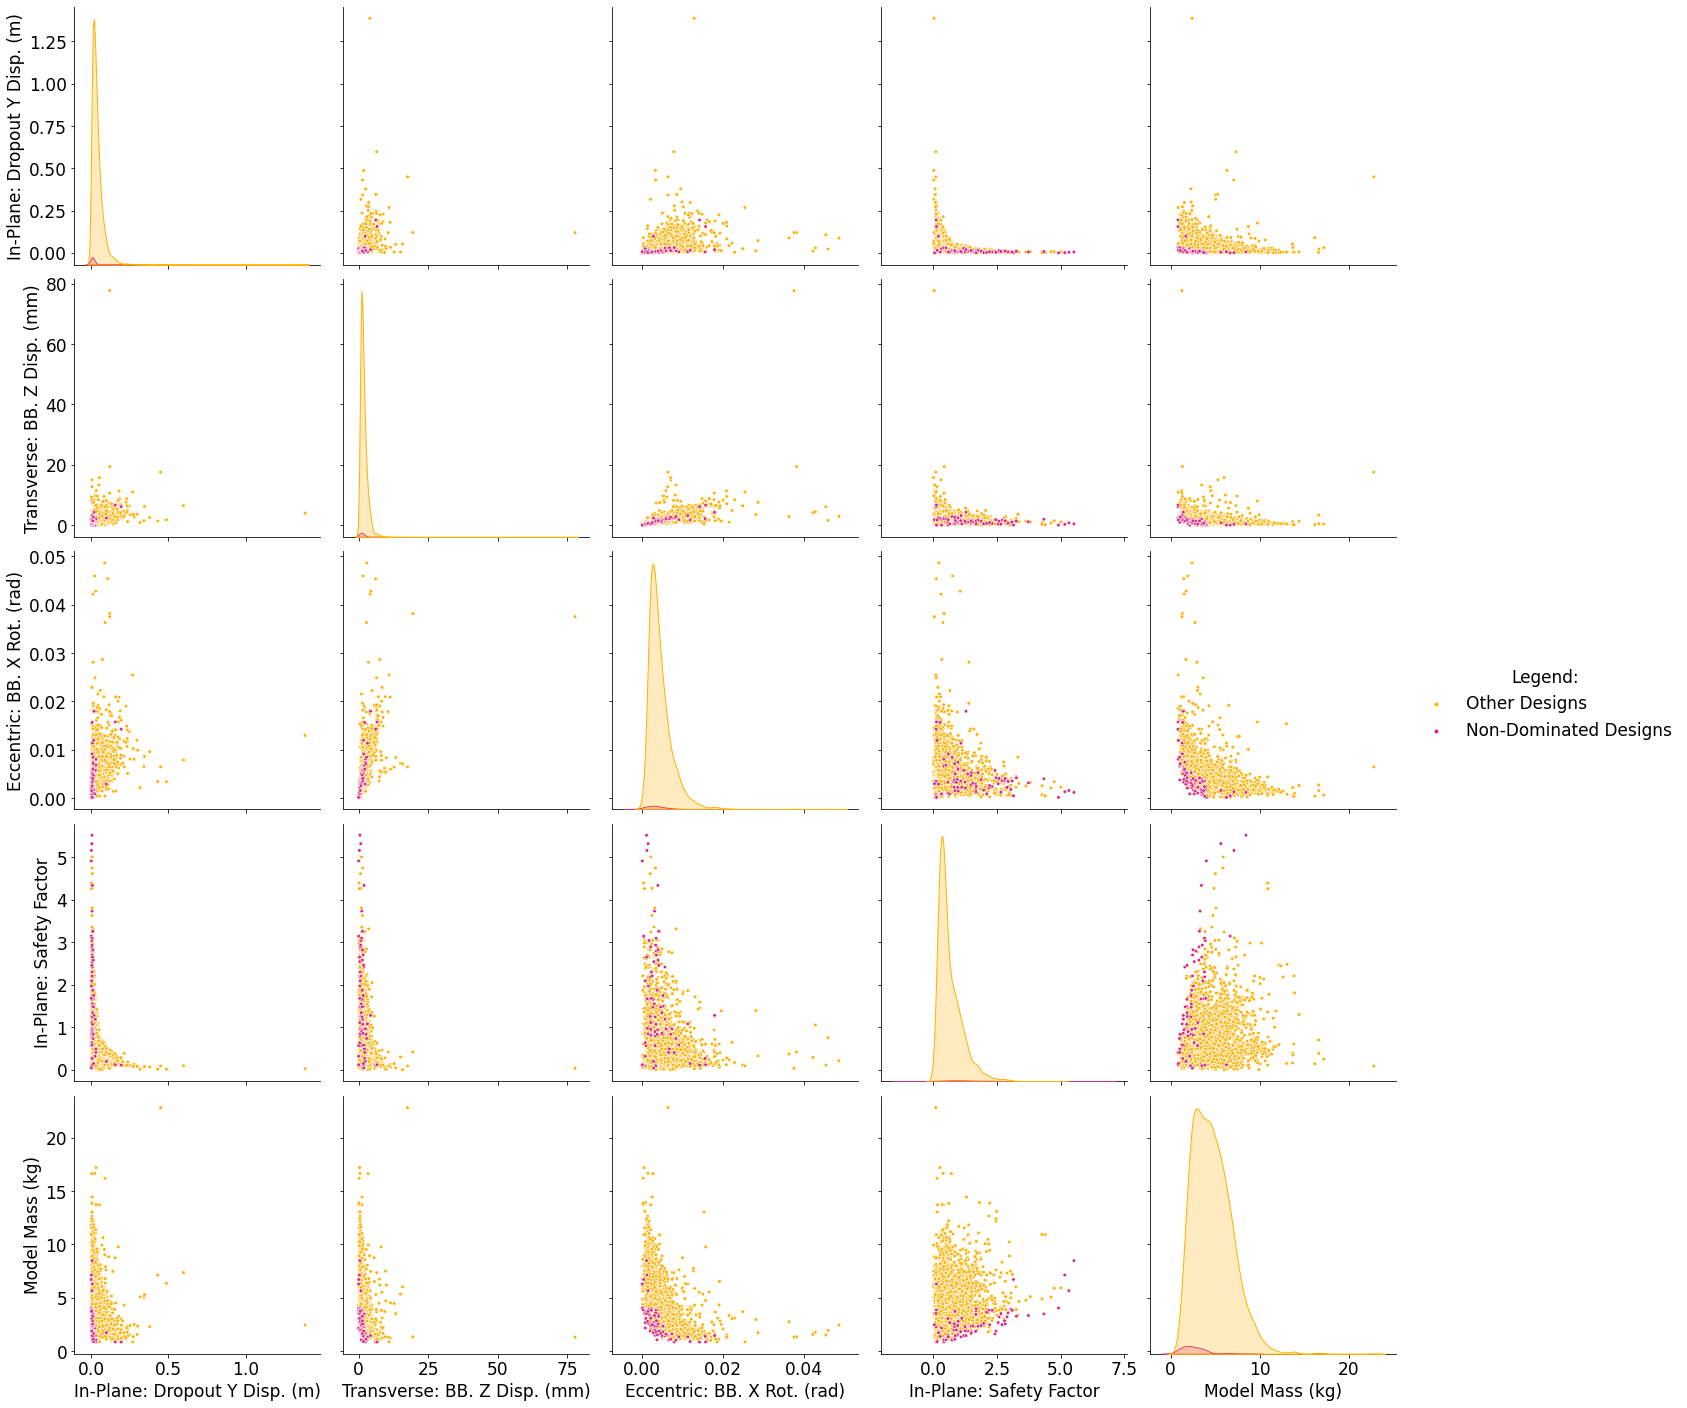

In [12]:
plt.rcParams.update({'font.size': 17})
# hue_order=["Non-Dominated", "Dominated"]
# palette=["#DC267F", "#648FFF"]
# markers=[".", "."]

hue_order=["Other Designs", "Non-Dominated Designs"]
palette=["#FFB000","#DC267F"]
markers=[".", "."]
sns.pairplot(data_par, hue="Legend:", height=4, palette=palette, hue_order=hue_order, markers=markers, plot_kws={"s": 50})

In [13]:
#Count feasible designs (satisfying safety factors)
both=0
one=0
two=0
none=0
for i in range(len(data.index)):
    if data["Sim 1 Safety Factor"].iloc[i]<1:
        if data["Sim 3 Safety Factor"].iloc[i]<1:
            both+=1
        else:
            one+=1
    elif data["Sim 3 Safety Factor"].iloc[i]<1:
        two+=1
    else:
        none+=1
print(both)
print(one)
print(two)
print(none)

1966
1272
182
626


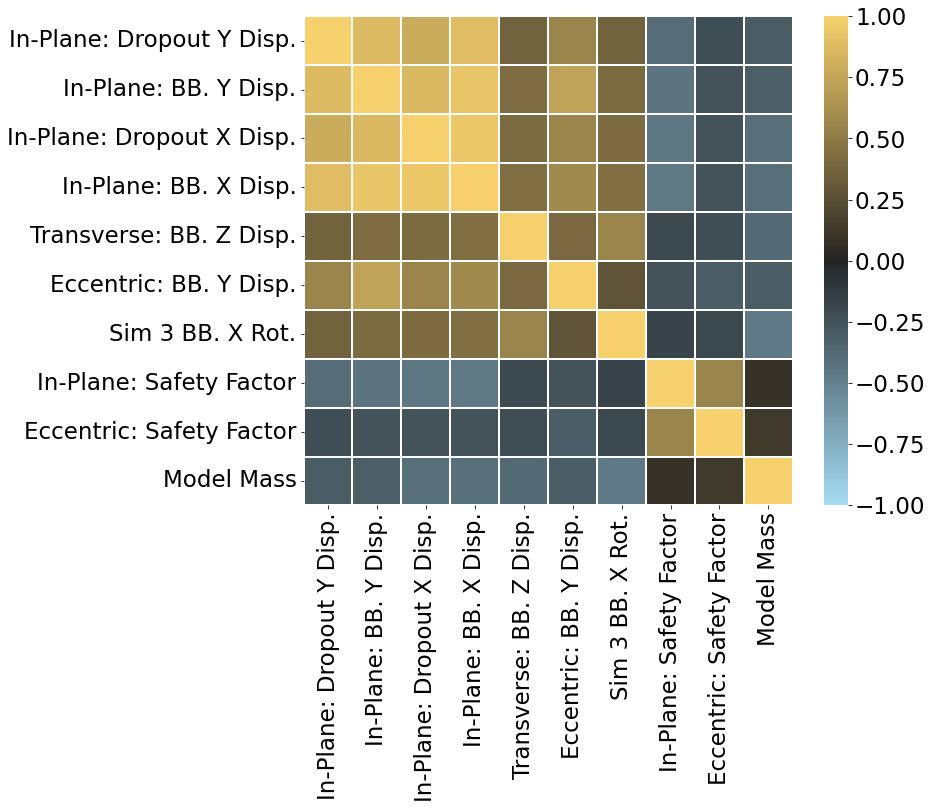

In [14]:
#Plot correlations between objectives

plt.rcParams.update({'font.size': 23})
# mask = np.triu(np.ones_like(corr, dtype=bool))
data_corr=data[["Sim 1 Dropout Y Disp.", "Sim 1 Bottom Bracket Y Disp.", "Sim 1 Dropout X Disp.", "Sim 1 Bottom Bracket X Disp.", "Sim 2 Bottom Bracket Z Disp.", "Sim 3 Bottom Bracket Y Disp.", "Sim 3 Bottom Bracket X Rot.", "Sim 1 Safety Factor", "Sim 3 Safety Factor", "Model Mass"]]

data_corr["Sim 1 Dropout Y Disp."]=abs(data_corr["Sim 1 Dropout Y Disp."])
data_corr["Sim 1 Bottom Bracket Y Disp."]=abs(data_corr["Sim 1 Bottom Bracket Y Disp."])
data_corr["Sim 1 Dropout X Disp."]=abs(data_corr["Sim 1 Dropout X Disp."])
data_corr["Sim 1 Bottom Bracket X Disp."]=abs(data_corr["Sim 1 Bottom Bracket X Disp."])
data_corr["Sim 3 Bottom Bracket Y Disp."]=abs(data_corr["Sim 3 Bottom Bracket Y Disp."])

data_corr.columns=["In-Plane: Dropout Y Disp.", "In-Plane: BB. Y Disp.", "In-Plane: Dropout X Disp.", "In-Plane: BB. X Disp.", "Transverse: BB. Z Disp.", "Eccentric: BB. Y Disp.", "Sim 3 BB. X Rot.", "In-Plane: Safety Factor", "Eccentric: Safety Factor", "Model Mass"]
corr=data_corr.corr(method="pearson")
palette=sns.diverging_palette(223, 65, l=85, center="dark", as_cmap=True)
# palette=sns.diverging_palette(250, 310, l=80, center="dark", as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
hm=sns.heatmap(corr, cmap=palette,
            square=True, linewidths=2, vmin=-1, vmax=1)

# cbar_kws={'label': 'Correlation'}